# Fully Connected Deep Neural Networks

## Content
* Definition
* Two Layers
    * Classification
    * Regression
* Three Layers
    * Classification
    * Regression
* Arbitrary hidden layers
    * Classification
    * Regression

Required tools

In [1]:
import numpy as np
import pandas as pd
import torch
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

Required config

In [2]:
torch.manual_seed(0)

## Definition

A neural network it's called a shallow neural network when it has more than one hidden layer.

If we add more neurons to the hidden layer we can obtain a more complex decision function, but this leads to overfitting. By adding more hidden layers -which can have any number of neurons each- we usually increase the performance of our model, while decreasing the risk of overfitting. 

Also, while shallow neural networks are not able to deal with non linearly-separable data, by adding a hidden layer to a neural network we can generate a decision function to separate non linearly-separable data.

### Two hidden layers

In order to make a fully conected deep neural network with $2$ hidden layers with $l_1, l_2$ neurons each, given an input size and an output size, use one the following codes:
  
**nn class**  
`from torch import nn`  
`class Net(nn.module):`  
` `  
`    def _init_(self, input_size, l1, l2, output_size):`  
`        super(Net, self).__init__()`  
`        self.linear1 = nn.Linear(input_size, l1)`  
`        self.linear2 = nn.Linear(l1, l2)`  
`        self.linear3 = nn.Linear(l2, output_size)`  
` `  
`    def forward(self, x):`  
`        x = torch.sigmoid(self.linear1(x))`  
`        x = torch.sigmoid(self.linear2(x))`  
`        x = self.linear3(x)`  
`        return x`  
` `  
`input_size = input_size`  
`l1 = l1`  
`l2 = l2`  
`output_size = output size`  

**nn.sequential**  
`from torch import nn`  
`model = nn.Sequential(`  
`        nn.Linear(input_size, l1), torch.sigmoid(),`  
`        nn.Linear(l1, l2), torch.sigmoid(),`  
`        nn.Linear(l2, output_size)`  
`        )`  
  
Instead of `torch.sigmoid` you may use `torch.tanh` or `torch.relu` or any other activation function as needed. 

### Classification

In [14]:
## 0. Import required tools
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch import nn,optim 
from torch.utils.data import Dataset, DataLoader

In [15]:
## 1. Import some data into a Dataset object
# Create the training dataset
train_dataset = dsets.MNIST(root = '/Users/RamsesLg/Desktop/Espacio_de_trabajo/Guía_DS/Python/Data', train=True, download=True, transform=transforms.ToTensor())
# Create the validating dataset
validation_dataset = dsets.MNIST(root = '/Users/RamsesLg/Desktop/Espacio_de_trabajo/Guía_DS/Python/Data', train=False, download=True, transform=transforms.ToTensor())

In [17]:
## 2. Create a model 

# Model class
class NetTanh(nn.Module):
    
    # Constructor
    def __init__(self, input_size, l1, l2, output_size):
        super(NetTanh, self).__init__()
        self.linear1 = nn.Linear(input_size, l1)
        self.linear2 = nn.Linear(l1, l2)
        self.linear3 = nn.Linear(l2, output_size)
    
    # Prediction
    def forward(self, x):
        x = torch.tanh(self.linear1(x))
        x = torch.tanh(self.linear2(x))
        x = self.linear3(x)
        return x
        
# Model object
model = NetTanh(input_size = 28*28, l1 = 50, l2 = 50, output_size = 10)
print(model)

NetTanh(
  (linear1): Linear(in_features=784, out_features=50, bias=True)
  (linear2): Linear(in_features=50, out_features=50, bias=True)
  (linear3): Linear(in_features=50, out_features=10, bias=True)
)


In [18]:
## 3. Make a trainer function 

def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    useful_stuff = {'training_loss': [], 'validation_accuracy': []}  
    
    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.data.item())
        
        correct = 0
        for x, y in validation_loader:
            z = model(x.view(-1, 28 * 28))
            _, label = torch.max(z, 1)
            correct += (label == y).sum().item()
    
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
    
    return useful_stuff

In [20]:
## 4.  Create criterion and dataloaders
# Create the criterion function
criterion = nn.CrossEntropyLoss()

# Create the training data loader and validation data loader object
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size = 2000, shuffle = False)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size = 5000, shuffle = False)

In [21]:
## 5.1 Train with sigmoid activation

# Create optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

# Train model
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs = 10)

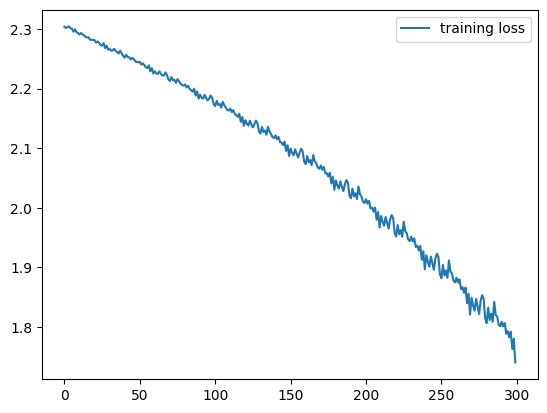

In [25]:
## 5. Plot training_loss 
plt.plot(training_results['training_loss'], label='training loss')
plt.legend()
plt.show()

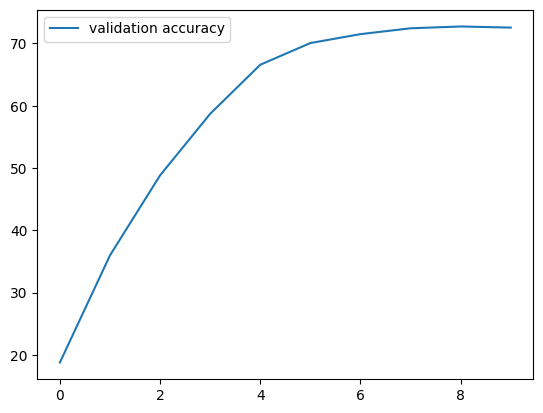

In [26]:
# Plot validation loss
plt.plot(training_results['validation_accuracy'], label = 'validation accuracy')
plt.legend()
plt.show()

### Regression

## Three hidden layers

In order to make a fully conected deep neural network with $3$ hidden layers with $l_1, l_2,l_3$ neurons each, given an input size and an output size, use one the following codes:
  
**nn class**  
`from torch import nn`  
`class Net(nn.module):`  
` `  
`    def _init_(self, input_size, l1, l2, l3, output_size):`  
`        super(Net, self).__init__()`  
`        self.linear1 = nn.Linear(input_size, l1)`  
`        self.linear2 = nn.Linear(l1, l2)`  
`        self.linear3 = nn.Linear(l2, l3)`  
`        self.linear4 = nn.Linear(l3, output_size)`  
` `  
`    def forward(self, x):`  
`        x = torch.sigmoid(self.linear1(x))`  
`        x = torch.sigmoid(self.linear2(x))` 
`        x = torch.sigmoid(self.linear3(x))`  
`        x = self.linear4(x)`  
`        return x`  
` `  
`input_size = input_size`  
`l1 = l1`  
`l2 = l2`  
`l3 = l3`  
`output_size = output size`  

**nn.sequential**  
`from torch import nn`  
`model = nn.Sequential(`  
`        nn.Linear(input_size, l1), torch.sigmoid(),`  
`        nn.Linear(l1, l2), torch.sigmoid(),`  
`        nn.Linear(l2, l3), torch.sigmoid(),`  
`        nn.Linear(l3, output_size)`  
`        )`  
  
Instead of `torch.sigmoid` you may use `torch.tanh` or `torch.relu` or any other activation function as needed. 

### Classification

In [3]:
## 0. Import required tools
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch import nn,optim 
from torch.utils.data import Dataset, DataLoader

In [4]:
## 1. Import some data into a Dataset object
# Create the training dataset
train_dataset = dsets.MNIST(root = '/Users/RamsesLg/Desktop/Espacio_de_trabajo/Guía_DS/Python/Data', train=True, download=True, transform=transforms.ToTensor())
# Create the validating dataset
validation_dataset = dsets.MNIST(root = '/Users/RamsesLg/Desktop/Espacio_de_trabajo/Guía_DS/Python/Data', train=False, download=True, transform=transforms.ToTensor())

In [15]:
## 2. Create a model 

# Model class
class NetTanh(nn.Module):
    
    # Constructor
    def __init__(self, input_size, l1, l2, l3, output_size):
        super(NetTanh, self).__init__()
        self.linear1 = nn.Linear(input_size, l1)
        self.linear2 = nn.Linear(l1, l2)
        self.linear3 = nn.Linear(l2, l3)
        self.linear4 = nn.Linear(l3, output_size)
    
    # Prediction
    def forward(self, x):
        x = torch.tanh(self.linear1(x))
        x = torch.tanh(self.linear2(x))
        x = torch.tanh(self.linear3(x))
        x = self.linear3(x)
        return x
        
# Model object
model = NetTanh(input_size = 28*28, l1 = 50, l2 = 50, l3 = 50, output_size = 10)
print(model)

NetTanh(
  (linear1): Linear(in_features=784, out_features=50, bias=True)
  (linear2): Linear(in_features=50, out_features=50, bias=True)
  (linear3): Linear(in_features=50, out_features=50, bias=True)
  (linear4): Linear(in_features=50, out_features=10, bias=True)
)


In [21]:
## 3. Make a function fro training

def train(model, criterion, train_loader, validation_loader, optimizer, epochs = 250):
    i = 0
    useful_stuff = {'training_loss': [], 'validation_accuracy': []}  
    
    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.data.item())
        
        correct = 0
        for x, y in validation_loader:
            z = model(x.view(-1, 28 * 28))
            _, label = torch.max(z, 1)
            correct += (label == y).sum().item()
    
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
    
    return useful_stuff

In [26]:
## 4. Create objects for training
# Create the criterion function
criterion = nn.CrossEntropyLoss()

# Create the training data loader and validation data loader object
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size = 2000, shuffle = False)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size = 5000, shuffle = False)

In [27]:
## 5.1 Train model

# Create optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

# Train model
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs = 10)

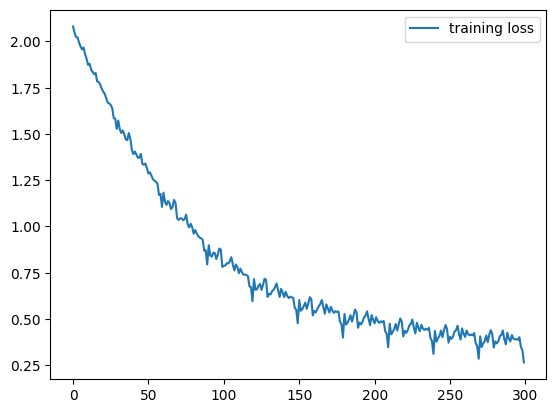

In [28]:
## 5. Plot training_loss 
plt.plot(training_results['training_loss'], label='training loss')
plt.legend()
plt.show()

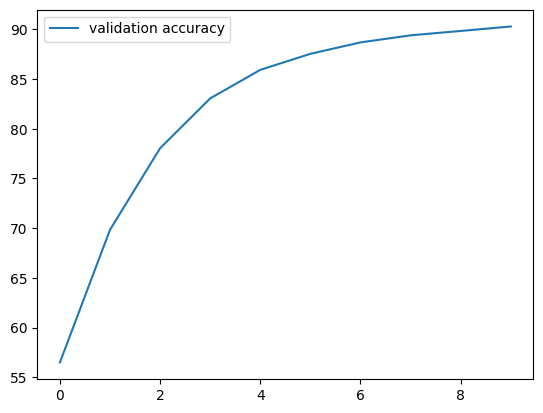

In [29]:
# Plot validation loss
plt.plot(training_results['validation_accuracy'], label = 'validation accuracy')
plt.legend()
plt.show()

### Regression

## Arbitrary layers

We can add more and more layers to our network manually but this is time consuming and labor intensive. In order to automate the process creating a neural network with an arbitrary number of layers, we'll use `nn.ModuleList()`. 

In order to make a fully conected deep neural network with $l$ hidden layers with $l_1,...,l_l$ neurons each, given an input size and an output size, use one the following code:

`class Net(nn.Module):`  
`    def __init__(self, layers):`  
`        super(Net, self).__init__()`  
`        self.hidden = nn.ModuleList()`  
` `  
`        for input_size, output_size in zip(Layers, Layers[1:]):`  
`            self.hidden.append(nn.Linear(input_size, output_size))`  
` `  
`    def forward(self, activation):`  
`        L = len(self.hidden)`  
` `  
`        for (l, linear_transform) in zip(range(L), self.hidden):`  
`            if l < L-1:`  
`                activation = torch.sigmoid(linear_transform(activation))`  
`            else:`  
`                activation = linear_transform(activation)`  
`        return activation`  
` `  
`layers = [input_size,l_1, l_2, ..., output_size]`  
`model = Net(layers)`  

Instead of `torch.sigmoid` you may use `torch.tanh` or `torch.relu` or any other activation function as needed. 

### Classification

In [30]:
## 0. Import required tools
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch import nn,optim 
from torch.utils.data import Dataset, DataLoader

In [31]:
## 1. Import some data into a Dataset object
# Create the training dataset
train_dataset = dsets.MNIST(root = '/Users/RamsesLg/Desktop/Espacio_de_trabajo/Guía_DS/Python/Data', train=True, download=True, transform=transforms.ToTensor())
# Create the validating dataset
validation_dataset = dsets.MNIST(root = '/Users/RamsesLg/Desktop/Espacio_de_trabajo/Guía_DS/Python/Data', train=False, download=True, transform=transforms.ToTensor())

In [33]:
## 2. Create mdoel

# Model class
class NetTanh(nn.Module):
    def __init__(self, layers):
        super(NetTanh, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            self.hidden.append(nn.Linear(input_size, output_size))
    
    def forward(self, activation):
        L = len(self.hidden)

        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L-1:
                activation = torch.tanh(linear_transform(activation))
            else:
                activation = linear_transform(activation)
        return activation

# Model object
Layers = [28*28, 25, 25, 25, 25, 10]
model = NetTanh(Layers)
print(model)

NetTanh(
  (hidden): ModuleList(
    (0): Linear(in_features=784, out_features=25, bias=True)
    (1-3): 3 x Linear(in_features=25, out_features=25, bias=True)
    (4): Linear(in_features=25, out_features=10, bias=True)
  )
)


In [39]:
## 3. Make a function for training

def train(model, criterion, train_loader, validation_loader, optimizer, epochs = 500):
    i = 0
    useful_stuff = {'training_loss': [], 'validation_accuracy': []}  
    
    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.data.item())
        
        correct = 0
        for x, y in validation_loader:
            z = model(x.view(-1, 28 * 28))
            _, label = torch.max(z, 1)
            correct += (label == y).sum().item()
    
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
    
    return useful_stuff

In [40]:
## 4. Create objects for training
# Create the criterion function
criterion = nn.CrossEntropyLoss()

# Create the training data loader and validation data loader object
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size = 2000, shuffle = False)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size = 5000, shuffle = False)

In [44]:
## 5.1 Train model

# Create optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

# Train model
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs = 10)

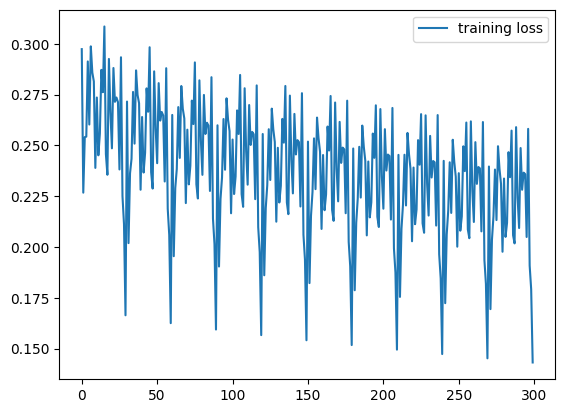

In [45]:
## 5. Plot training_loss 
plt.plot(training_results['training_loss'], label='training loss')
plt.legend()
plt.show()

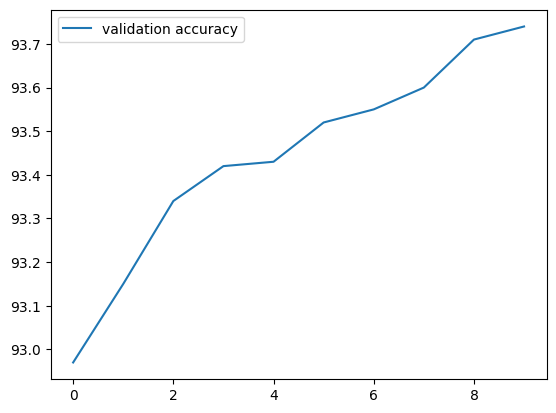

In [46]:
# Plot validation loss
plt.plot(training_results['validation_accuracy'], label = 'validation accuracy')
plt.legend()
plt.show()

### Regression

In [48]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y
